# IBM Advanced Data Science Capstone

In this capstone project, I will build a disinformation classifier which will take in a news article's text as input and output a prediction about whether it is real or fake news.

## Notebook Outline
This notebook will cover the following steps of the data science process:

- extract, transform, and load (ETL) the data
- data cleaning
- initial data exploration: descriptive statistics and visualization
- feature engineering
- model definition
- model training
- model evaluation
- model deployment 

# ETL

### Extraction
I am using a data set accessed from: https://www.kaggle.com/c/fake-news/data. It consists of three .csv files:
- train.csv
- test.csv
- submit.csv

train.csv is a data set with the following attributes:
- id: unique id for a news article
- title: the title of a news article
- author: author of the news article
- text: the text of the article; could be incomplete
- label: a label that marks the article as potentially unreliable (1: unreliable, 0: reliable)

test.csv is a data set with all of the same attributes except the labe;.

submit.csv is a table of id matched against label, as relates to the test set.

### Transforming and Loading the Data
I will load the data using IBM Watson Studio's built-in function to insert code. I will load each CSV file as a pandas DataFrame, merge test.csv and submit.csv on the id key, and then concatenate the train and new test DataFrames. This will produce a single DataFrame with all of the attributes of the train DataFrame. I will then split this DataFrame into DataFrames containing all of the real and fake articles respectively for ease of processing. I will also swap the labels so "real" = 1 and "fake" = 0, as this is the standard approach.

In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
df_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [4]:
df_submit.head()

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1


In [5]:
# Merge submit and test on id

df_new_test = pd.merge(df_test, df_submit, left_on='id', right_on='id', how='left') 
df_new_test.head()

,id,title,author,text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,1
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1


In [6]:
# Double check that the id will line up

df_train.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [7]:
# Observe end of df_submit
df_submit.tail()

,id,label
5195,25995,0
5196,25996,1
5197,25997,0
5198,25998,1
5199,25999,0


In [8]:
# Double check that merge executed successfully

df_new_test.tail()

,id,title,author,text,label
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...,0
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...,1
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...,0
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...,1
5199,25999,"Awkward Sex, Onscreen and Off - The New York T...",Teddy Wayne,Perhaps you’ve seen the new TV series whose pi...,0


In [9]:
df = pd.concat([df_train, df_new_test], ignore_index=True) 
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [10]:
# Double check the end of the DataFrame

df.tail()

,id,title,author,text,label
25995,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...,0
25996,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...,1
25997,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...,0
25998,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...,1
25999,25999,"Awkward Sex, Onscreen and Off - The New York T...",Teddy Wayne,Perhaps you’ve seen the new TV series whose pi...,0


In [11]:
# Split the DataFrame into two new DataFrames containing only real and only fake articles respectively

df_real = df.loc[df['label'] == 0].copy()
df_fake = df.loc[df['label'] == 1].copy()

In [12]:
df_real.reset_index(drop=True, inplace=True)
df_real.head()

,id,title,author,text,label
0,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
1,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
2,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
3,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
4,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [13]:
df_fake.reset_index(drop=True, inplace=True)
df_fake.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
2,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
3,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
4,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1


In [14]:
# swap the labels for later correct use of cross entropy loss

df_real["label"].replace(0, 1, inplace=True)
df_fake["label"].replace(1, 0, inplace=True)

In [15]:
df_real.head()

,id,title,author,text,label
0,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,1
1,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",1
2,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",1
3,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,1
4,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,1


In [16]:
df_fake.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,0
1,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",0
2,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,0
3,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,0
4,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,0


In [17]:
# Add a class column to the dataframes
df_real['class'] = "Real"
df_fake['class'] = "Fake"

In [18]:
df_real.head()

,id,title,author,text,label,class
0,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,1,Real
1,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",1,Real
2,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",1,Real
3,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,1,Real
4,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,1,Real


In [19]:
!pip install wordcloud

     |████████████████████████████████| 368kB 9.2MB/s eta 0:00:01


In [20]:
import nltk
nltk.download('popular', halt_on_error=False) 

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading packag

True

In [21]:
# Import required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D, Flatten, Dropout
from sklearn.model_selection import train_test_split

#from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

## Initial Data Cleaning

### Why perform data cleaning before visualization?
Certain types of data cleanign are important to do before computing statistics or attempting visualization. Cheifly, we want to remove any empty values, since we cannot impute this kind of data.

In [22]:
# Cast all text to string

df_real["text"] = df_real["text"].astype(str)
df_fake["text"] = df_fake["text"].astype(str)

In [23]:
# Check for issue with empty rows
empty_real = [index for index, text in enumerate(df_real.text.values) if str(text).strip() == '']
df_real.iloc[empty_real]

,id,title,author,text,label,class


In [24]:
empty_fake = [index for index, text in enumerate(df_fake.text.values) if str(text).strip() == '']
df_fake.iloc[empty_fake].head()

,id,title,author,text,label,class
38,82,Huma’s Weiner Dogs Hillary,Steve Sailer,,0,Fake
78,169,Mohamad Khweis: Another “Virginia Man” (Palest...,James Fulford,,0,Fake
141,295,A Connecticut Reader Reports Record Voter Regi...,VDARE.com Reader,,0,Fake
219,470,BULLETIN: There ARE Righteous Jews For Trump!;...,admin,,0,Fake
294,592,Is your promising internet career over now Vin...,newsbiscuit editorial team,,0,Fake


In [25]:
# Remove all empty rows

df_real = df_real.drop(labels=empty_real)

## Statistics, Bounding, and Visualization

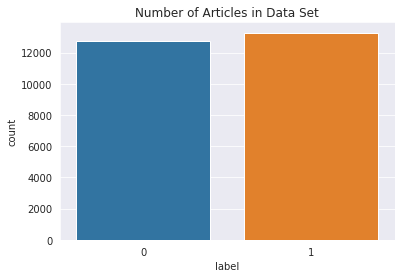

In [26]:
# Bar chart for number of articles overall to check dataset balance

sns.set_style("darkgrid")
sns.countplot(df.label).set_title("Number of Articles in Data Set")
plt.show()

In [27]:
def avg(text):
    w = [len(word) for word in text.strip().split(" ")]
    w_avg = sum(w)/len(w)
    return w_avg

In [28]:
# Statistics

def stats(df_arg):
    df_arg["word count"] = df_arg['text'].str.split().map(lambda x: len(x))
    df_arg["sentence count"] = df_arg['text'].map(lambda x: x.count("."))
    df_arg["avg word length"] = df_arg['text'].map(lambda x: avg(x))
    df_arg["avg sentence length"] = (df_arg["word count"] / df_arg["sentence count"])


In [29]:
stats(df_real)
stats(df_fake)

In [30]:
df_real.head()

,id,title,author,text,label,class,word count,sentence count,avg word length,avg sentence length
0,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,1,Real,710,30,4.723521,23.666667
1,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",1,Real,203,18,4.791262,11.277778
2,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",1,Real,822,53,4.799764,15.509434
3,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,1,Real,1440,72,4.632231,20.000000
4,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,1,Real,1736,174,4.787930,9.977011


In [31]:
df_fake.head()

,id,title,author,text,label,class,word count,sentence count,avg word length,avg sentence length
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,0,Fake,820,37,5.013415,22.162162
1,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",0,Fake,1266,69,5.076619,18.347826
2,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,0,Fake,557,28,4.792487,19.892857
3,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,0,Fake,154,5,5.097403,30.800000
4,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,0,Fake,489,22,4.582822,22.227273


In [32]:
# Descriptive statistics for real data

# Get descriptive stats for each numeric column in both real and fake
# Turn infinity values into NaN and then drop all NaN

# Real
df_real_desc = df_real[["word count", "sentence count", "avg word length", "avg sentence length"]].astype(float).describe()
df_real_desc = df_real_desc.replace([np.inf, -np.inf], np.nan)
df_real_desc = df_real_desc.dropna()

# Fake
df_fake_desc = df_fake[["word count", "sentence count", "avg word length", "avg sentence length"]].astype(float).describe()
df_fake_desc = df_fake_desc.replace([np.inf, -np.inf], np.nan)
df_fake_desc = df_fake_desc.dropna()


In [33]:
# descriptive statistics for real data
df_real_desc.head()

,word count,sentence count,avg word length,avg sentence length
count,12726.00,12726.0,12726.000000,12726.000000
min,1.00,0.0,3.000000,1.000000
25%,469.25,25.0,4.617544,14.585108
50%,865.00,50.0,4.786798,17.562500
75%,1234.00,77.0,4.958489,20.863005


In [34]:
# Descriptive stats for fake data
df_fake_desc.head()

,word count,sentence count,avg word length,avg sentence length
count,13274.00,13274.0,13274.000000,13166.000000
min,0.00,0.0,0.000000,0.333333
25%,170.00,8.0,4.792415,16.537054
50%,356.00,18.0,5.033423,20.666667
75%,648.75,33.0,5.275691,25.459790


In [35]:
# Remove count as it does not add useful information

df_real_desc = df_real_desc.drop(["count"])
df_fake_desc = df_fake_desc.drop(["count"])

In [36]:
# Outlier cropping

def calculate_outliers(df, col):
    
    # Calculate interquartile range
    iqr = df[col]["75%"] - df[col]["25%"]

    # Find outlier bounds
    if (df[col]["25%"] - (1.5*iqr)) < 0:
        min_bound = 0
    else:
        min_bound = df[col]["25%"] - (1.5*iqr)

    max_bound = df[col]["75%"] + (1.5*iqr)
    
    return min_bound, max_bound

def show_outliers(df):
    for col in df:
        min_bound, max_bound = calculate_outliers(df, col)
        print ("{}: min bound = {}, max bound = {}".format(col, min_bound, max_bound))

In [37]:
show_outliers(df_real_desc)

word count: min bound = 0, max bound = 2381.125
sentence count: min bound = 0, max bound = 155.0
avg word length: min bound = 4.106126803070195, max bound = 5.469906363882812
avg sentence length: min bound = 5.168261966021401, max bound = 30.279850901195243


In [38]:
show_outliers(df_fake_desc)

word count: min bound = 0, max bound = 1366.875
sentence count: min bound = 0, max bound = 70.5
avg word length: min bound = 4.067500583529643, max bound = 6.000604700996309
avg sentence length: min bound = 3.1529507078287526, max bound = 38.84389391096708


Since we are most interested in word count (as this most closely relates to the number of total features), we will only enforce crops on word count. We will judge the min_bound = 50 and the max_bound = 2400.

In [39]:
def graph(df, df1):
        
    for col in df.columns[6:]:
        sns.distplot(df[[col]], hist=False, rug=True).set_title(col)
        plt.xlim(calculate_outliers(df1, col))
        plt.show()

        sns.boxplot(data=df[col], palette="Set3").set_title(col)
        plt.ylim(calculate_outliers(df1, col))
        plt.show()

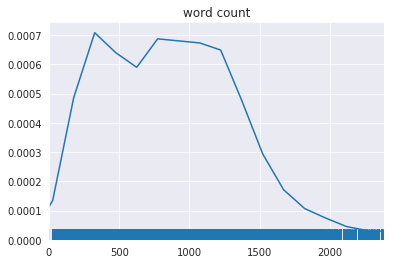

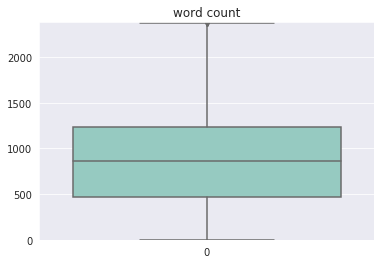

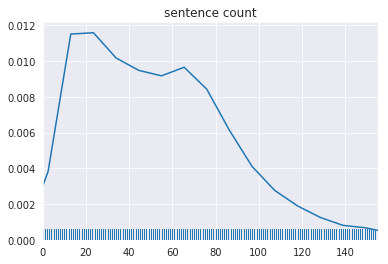

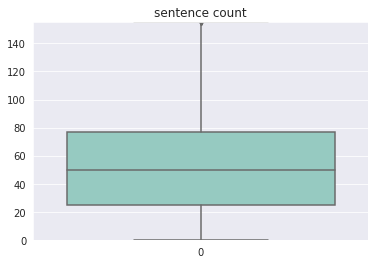

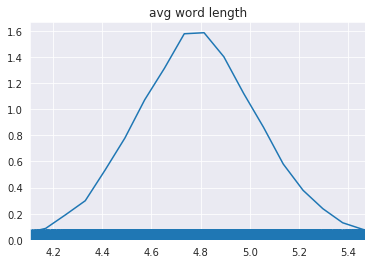

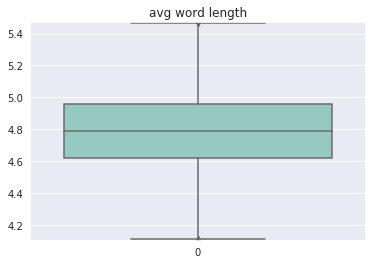

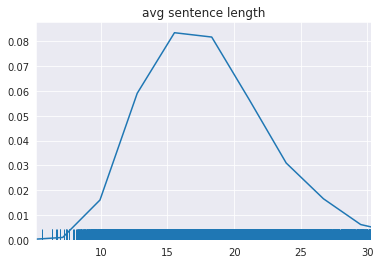

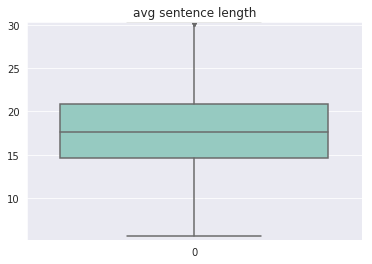

In [40]:
graph(df_real, df_real_desc)

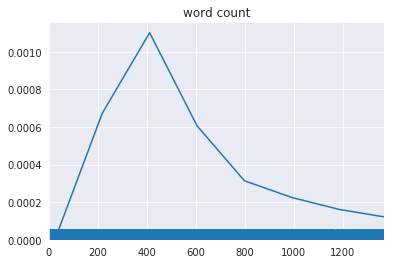

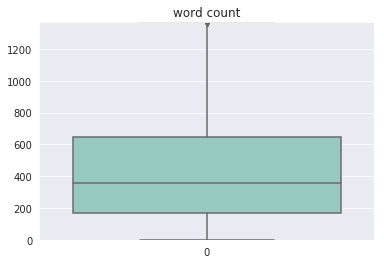

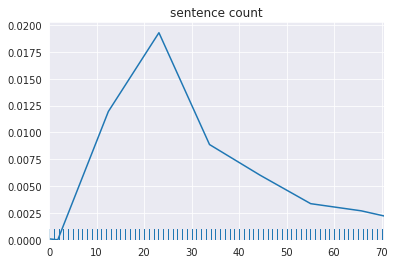

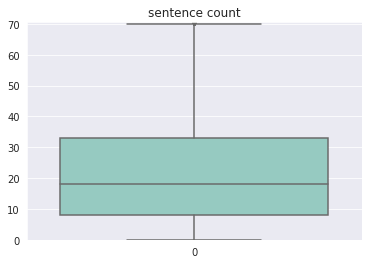

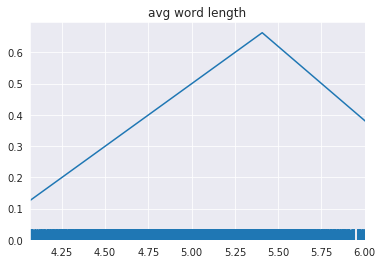

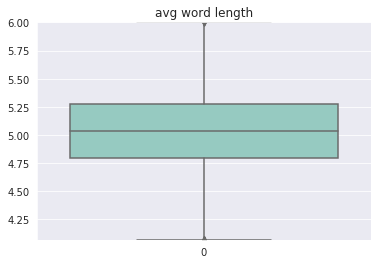

/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


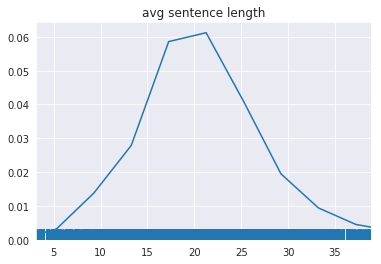

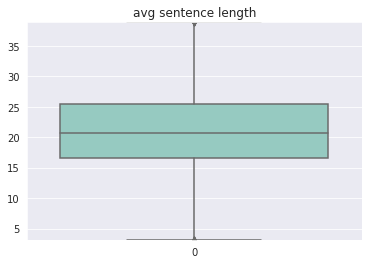

In [41]:
graph(df_fake, df_fake_desc)

## Further Data Cleaning
Now, I remove stopwords and punctuation. Performing this step now will make the following visualizations more effective as they will better represent the main subjects of the text, which is what they are intended to do.

In [26]:
# Remove stopwords and punctuation

from string import punctuation

def remove_stopwords(text):
    stop = set(stopwords.words('english'))
    
    # Remove punctuation
    punctuation = list(string.punctuation)
    stop.update(punctuation)
        
    cleaned = []
    for i in text.split():
        if i.strip().lower() not in stop and i.isalpha():
            cleaned.append(i.strip())
    return " ".join(cleaned)

In [27]:
# Remove html

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)

def denoise_text(text):
    # text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

In [28]:
#Apply function on text column
df_real['text'] = df_real['text'].apply(denoise_text)
df_fake['text'] = df_fake['text'].apply(denoise_text)

### WordClouds

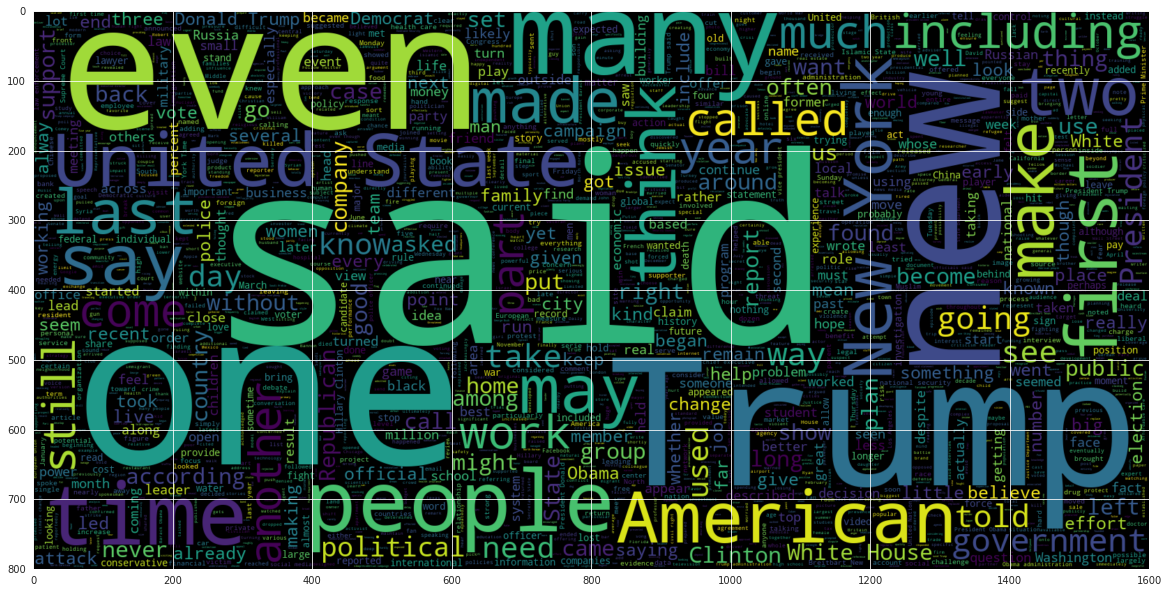

In [45]:
# Wordcloud for real articles

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df_real.text))
plt.imshow(wc , interpolation = 'bilinear')

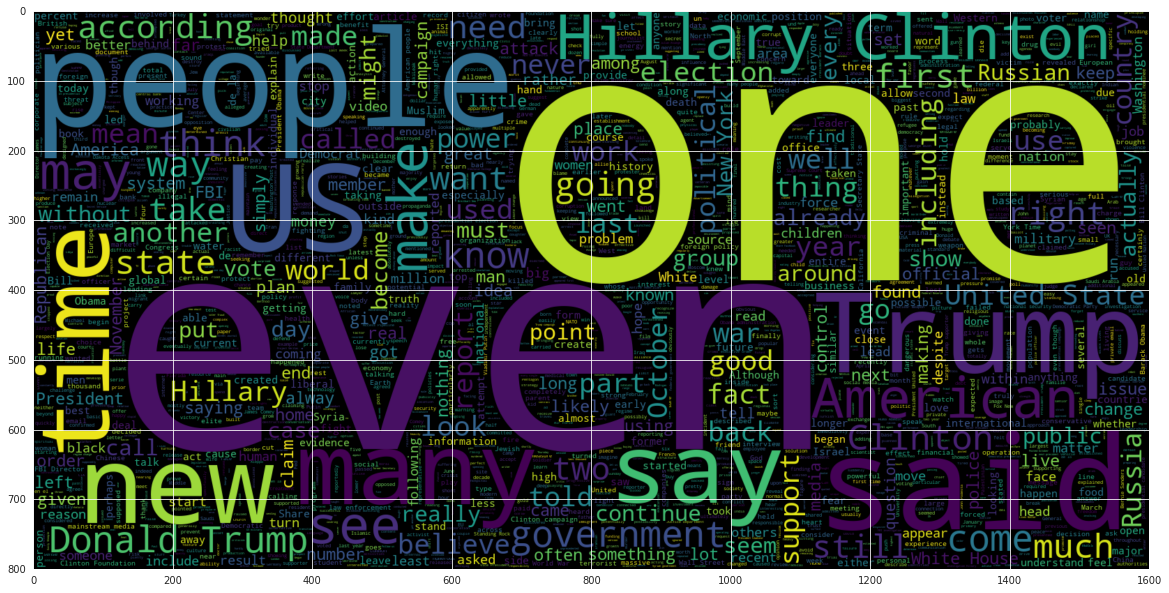

In [46]:
# Wordcloud for fake articles

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df_fake.text))
plt.imshow(wc , interpolation = 'bilinear')

### Top Non-Stopwords by Frequency

In [47]:
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    
    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    
    # Remove common non-stopwords that don't offer information
    common = ["also", "said", "would", "one"]
    
    counter = Counter(corpus)
    most = counter.most_common()
    x, y=[], []
    for word,count in most[:10]:
        if word not in string.punctuation:
            x.append(word)
        y.append(count)
            
    sns.barplot(x=y,y=x)
    plt.show()

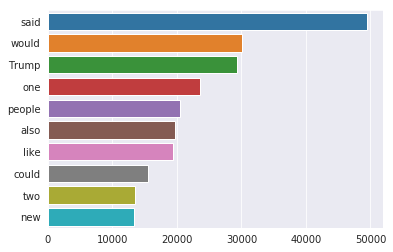

In [48]:
plot_top_non_stopwords_barchart(df_real["text"])

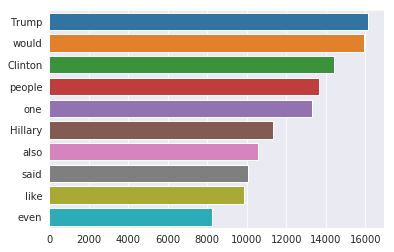

In [49]:
plot_top_non_stopwords_barchart(df_fake.text)

### N-gram Analysis
This is a useful analysis tool for identifying the main topics within a text.

In [50]:
def get_top_ngram(corpus, n):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [51]:
get_top_ngram(df_real["text"], 2)

[('united states', 7640),
 ('new york', 6549),
 ('white house', 3731),
 ('donald trump', 3364),
 ('hillary clinton', 1707),
 ('national security', 1544),
 ('president trump', 1466),
 ('breitbart news', 1425),
 ('islamic state', 1421),
 ('said would', 1388)]

In [52]:
get_top_ngram(df_fake["text"], 2)

[('hillary clinton', 4611),
 ('donald trump', 3849),
 ('united states', 2933),
 ('new york', 1959),
 ('white house', 1655),
 ('de la', 1031),
 ('clinton campaign', 885),
 ('clinton foundation', 800),
 ('law enforcement', 771),
 ('foreign policy', 769)]

In [53]:
def plot_ngrams(df, n):
    top_n_bigrams=get_top_ngram(df['text'],n)[:10] 
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
    plt.show()

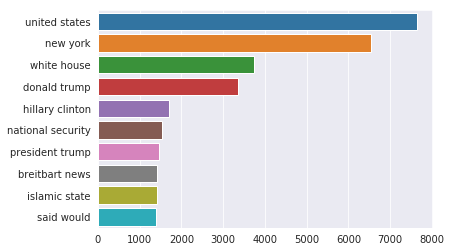

In [54]:
plot_ngrams(df_real, 2)

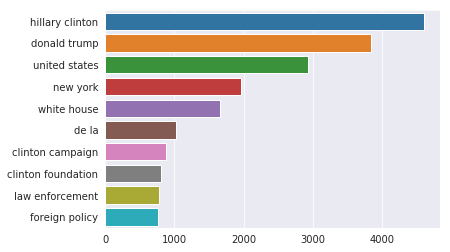

In [55]:
plot_ngrams(df_fake, 2)

# Feature Engineering

This process will consist of the following steps:
- outlier removal
- tokenization
- lemmatization
- cionversion to vectors

## Tokenization

In [29]:
# Merge preprocessed dataframes and add titles to text
df_real["text"] = df_real["title"] + " " + df_real["text"]
df_fake["text"] = df_fake["title"] + " " + df_fake["text"]

df = pd.concat([df_real, df_fake], ignore_index=True)
df["text"] = df["text"].astype(str)

In [30]:
# Check indexes

df.head()

,id,title,author,text,label,class
0,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",1,Real
1,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,Jackie Mason: Hollywood Would Love Trump if He...,1,Real
2,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,Benoît Hamon Wins French Socialist Party’s Pre...,1,Real
3,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Excerpts From a Draft Script for Donald Trump’...,1,Real
4,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,"A Back-Channel Plan for Ukraine and Russia, Co...",1,Real


In [31]:
def tokenize_and_lemmatize(df):
    corpus=[]
    stop_words = set(nltk.corpus.stopwords.words("english"))
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    lem=WordNetLemmatizer()
    
    for article in df['text'].values:
        sentences_list = []
        sentences = sent_tokenize(article)
        
        for sent in sentences:
            sent = sent.lower()
            tokens = tokenizer.tokenize(sent)
            words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
            sentences_list.extend(words)
        corpus.append(sentences_list)
    return corpus

corpus = tokenize_and_lemmatize(df)
print ("Done")

Done


## Word2Vec Model Training
now, I will create vector embeddings for all words in the articles.

In [32]:
!pip install --upgrade gensim

     |████████████████████████████████| 24.2MB 7.6MB/s eta 0:00:01|██████▋                         | 5.0MB 7.6MB/s eta 0:00:03
     |████████████████████████████████| 112kB 46.3MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/17/49/ea/74939572d8d071ff3c63a98e3e8dadef1117cc93c33efaa504
Successfully built smart-open


In [33]:
import gensim

In [34]:
#Dimension of vectors we are generating
embedding_dim = 100

#Creating Word Vectors by Word2Vec Method (takes abput 5-10 min)
w2v_model = gensim.models.Word2Vec(sentences=corpus, size=embedding_dim, window=5, min_count=1)

In [35]:
#vocab size
len(w2v_model.wv.vocab)

159332

In [63]:
w2v_model.wv.most_similar("trump")

[('hillary', 0.5984886884689331),
 ('donald', 0.5937028527259827),
 ('candidacy', 0.5936930775642395),
 ('candidate', 0.5927643775939941),
 ('inauguration', 0.5823712348937988),
 ('pence', 0.5771675109863281),
 ('incoming', 0.5755965709686279),
 ('presumptive', 0.5520719289779663),
 ('tump', 0.5471833944320679),
 ('clinton', 0.538860559463501)]

In [64]:
w2v_model.wv.most_similar("facebook")

[('twitter', 0.7167364358901978),
 ('posting', 0.6828237175941467),
 ('instagram', 0.6667261123657227),
 ('users', 0.6491492390632629),
 ('posts', 0.6364640593528748),
 ('snapchat', 0.6310102939605713),
 ('online', 0.6298764944076538),
 ('page', 0.6283034086227417),
 ('google', 0.6174126863479614),
 ('website', 0.6090371608734131)]

In [65]:
w2v_model.wv.most_similar("iran")

[('saudis', 0.7303969860076904),
 ('assad', 0.6866587400436401),
 ('iranians', 0.677071213722229),
 ('iranian', 0.6722283959388733),
 ('turkey', 0.6636068820953369),
 ('tehran', 0.6622982621192932),
 ('yemen', 0.6592258214950562),
 ('houthis', 0.6571252346038818),
 ('israel', 0.6527372002601624),
 ('sanctions', 0.6516993045806885)]

The feature vectors are well formed.

In [36]:
from keras.preprocessing.text import Tokenizer

# Develops a vocabulary of all tokens in the dataset and develops a consistent mapping from words in the vocabulary to unique integers

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

# Encode the sequences (i.e. the articles)
corpus = tokenizer.texts_to_sequences(corpus)

Using TensorFlow backend.


In [37]:
# Define a max input length and pad sequences to that length

from keras.preprocessing.sequence import pad_sequences 

max_length = 2400
corpus = pad_sequences(corpus, maxlen=max_length, padding='post')

In [38]:
# Define vocabulary size (largest integer value)

vocab_size = len(tokenizer.word_index) + 1

# Model Definition
I will now define two different models for classifying my textual input. As per the requirements of the courswe, one will be a deep learning algorithm and the other will be a machine learning algoirthm.


## Deep Learning Algorithm
I plan to use a shallow 1-D Convolutional Neural Network.

Before i can define my models, I need to create a weights matrix. I chose to do this in this step rather than in my ETL notebook so that I could practice loading the word2vec model from file.

In [39]:
# create a weight matrix for the Embedding layer from a loaded embedding
def get_weight_matrix(model, vocab):
    weight_matrix = np.zeros((vocab_size, embedding_dim))
    
    # store each vector as a column in the matrix
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [40]:
# get vectors in the right order
embedding_vectors = get_weight_matrix(w2v_model, tokenizer.word_index)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [41]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(corpus, df["label"].values) 

## CNN

In [50]:
# define model

model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_vectors], input_length=max_length, trainable=False))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(rate=0.8))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 2400, 100)         15933300  
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 2396, 64)          32064     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 1198, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1198, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 76672)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 76673     
Total params: 16,042,037
Trainable params: 108,737
Non-trainable params: 15,933,300
__________________________________________________________

Train on 13650 samples, validate on 5850 samples
Epoch 1/4
13650/13650 [==============================] - 248s 18ms/sample - loss: 0.5032 - acc: 0.7838 - val_loss: 0.3337 - val_acc: 0.8634
Epoch 2/4
13650/13650 [==============================] - 249s 18ms/sample - loss: 0.3459 - acc: 0.8610 - val_loss: 0.3149 - val_acc: 0.8726
Epoch 3/4
13650/13650 [==============================] - 251s 18ms/sample - loss: 0.3204 - acc: 0.8727 - val_loss: 0.3050 - val_acc: 0.8774
Epoch 4/4
13650/13650 [==============================] - 251s 18ms/sample - loss: 0.3078 - acc: 0.8787 - val_loss: 0.3102 - val_acc: 0.8815
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


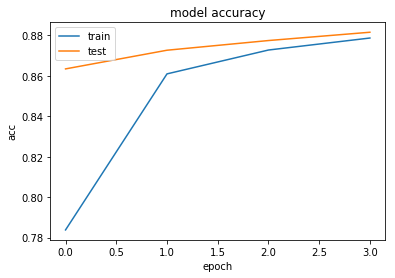

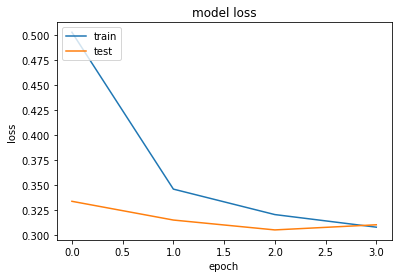

In [51]:
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit network
history = model.fit(X_train, y_train, batch_size=64, validation_split=0.3, epochs=4, verbose=1)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Machine Learning Algorithm
This is a good resource for ML text classification: http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/.

I think I will use a SVM with tf-idf feature creation.

### TF-IDF Additional Feature Creation

“Term Frequency – Inverse Document Frequency
TF-IDF is the product of the TF and IDF scores of the term.

TF-IDF=TF / IDF
 

Term Frequency : This summarizes how often a given word appears within a document.

TF = Number of times the term appears in the doc / Total number of words in the doc
 


Inverse Document Frequency: This downscales words that appear a lot across documents. A term has a high IDF score if it appears in a few documents. Conversely, if the term is very common among documents (i.e., “the”, “a”, “is”), the term would have a low IDF score.

IDF=ln(Number of docs /Number docs the term appears in)

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm

In [53]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df["text"],df['label'],test_size=0.3)

In [54]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [55]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df["text"])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [56]:
print(Train_X_Tfidf)

  (0, 4972)	0.025711408168772373
  (0, 4959)	0.048557232147070355
  (0, 4951)	0.04237848594746457
  (0, 4920)	0.050305176658843424
  (0, 4890)	0.04534888498750867
  (0, 4885)	0.03456428967149616
  (0, 4880)	0.0961186084076412
  (0, 4879)	0.04680185071680032
  (0, 4876)	0.03258077455956859
  (0, 4865)	0.14295036236467304
  (0, 4848)	0.0604837192574224
  (0, 4835)	0.07481815726493564
  (0, 4833)	0.05600947116540118
  (0, 4831)	0.052754539210376275
  (0, 4817)	0.1128073219942076
  (0, 4805)	0.04558212515735782
  (0, 4802)	0.04123307291421403
  (0, 4651)	0.036490235272741055
  (0, 4642)	0.04248555096284976
  (0, 4641)	0.043443682707736284
  (0, 4640)	0.19996488869047394
  (0, 4639)	0.37807744730901843
  (0, 4533)	0.024948035527322634
  (0, 4487)	0.07278545174121584
  (0, 4484)	0.023171297005353367
  :	:
  (18199, 698)	0.1610663344129518
  (18199, 696)	0.037569548279032985
  (18199, 694)	0.06605859268480749
  (18199, 633)	0.058942604086289895
  (18199, 621)	0.030921098936747354
  (18199, 52

In [57]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df["text"])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [58]:
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', verbose=True)
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

[LibSVM]SVM Accuracy Score ->  88.75641025641026


# Model Evaluation
I will now evaluate my models. As they are both classification models, I will use:

- Accuracy
- Precision
- Recall
- F! score

## Deep Learning Model Evaluation

In [59]:
y_pred = (model.predict(X_test) > 0.5).astype("int")

In [60]:
from sklearn.metrics import classification_report, accuracy_score

In [61]:
accuracy_score(y_test, y_pred)

0.878

In [62]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.88      3328
           1       0.91      0.84      0.87      3172

   micro avg       0.88      0.88      0.88      6500
   macro avg       0.88      0.88      0.88      6500
weighted avg       0.88      0.88      0.88      6500



## Machine Learning Model Evaluation

In [63]:
print(classification_report(Test_Y,predictions_SVM))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3943
           1       0.88      0.89      0.89      3857

   micro avg       0.89      0.89      0.89      7800
   macro avg       0.89      0.89      0.89      7800
weighted avg       0.89      0.89      0.89      7800



## Summary of Model Evaluation

In summary:

- Shallow 1-D CNN: avg F1 score = 0.88
- SVM: avg F1 score = 0.89

Therefore, the SVM performed marginally better. If I were to further improve my models, I think I could tune the hyperparameters of the CNN and use beter regularization technqiues.

# Model Deployment
I will deploy my model as a PDF dpocument to be handed over to stakeholders.